In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.special import expit
from scipy.stats import bernoulli
from sklearn import preprocessing

%matplotlib inline

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Data generation

In [2]:
def data_generation(n,dim,bias,alpha_vec,alpha_0):

    X  = preprocessing.normalize(np.random.randn(n,dim))
    prob_vec = expit(np.dot(alpha_vec,X.T) + alpha_0)
    T  = bernoulli.rvs(prob_vec)
    Y = np.dot(alpha_vec,X.T) + bias*T + 0.01*np.random.randn(X.shape[0])
    return (X,T,Y)

In [3]:
def bias_function(X,T,Y,wvec,sigma):
    beta_vec = np.exp(0.5*sigma**2 * np.sum(X**2,axis=1))
    return np.sum(Y[T==1]*np.exp(-np.dot(X[T==1,:],wvec))*(beta_vec[T==1]-1)) - np.sum(Y[T==0]*np.exp(np.dot(X[T==0,:],wvec))*(beta_vec[T==0]-1))

## Simulation

In [4]:
num_repeats = 30
num_samples = [10,100,1000]
dim = 5

delta = 1e-5
lmbda = 1

eps_values = [1e-2,1e-1,1,10]
num_epsilons = len(eps_values)

func_vals = np.zeros((len(eps_values),len(num_samples)))

wvec = np.random.randn(dim,1)

In [5]:
bias = 3
alpha_vec = np.array([0.5,0.4,0.3,0.2,0.1])
alpha_0 = 0.05

for (i,n) in enumerate(num_samples):
    for (j,epsilon) in enumerate(eps_values):
        sigma = 2*np.sqrt(2*np.log(1.25/delta))/(n*epsilon*lmbda)
        for k in range(num_repeats):
            (X,T,Y) = data_generation(n,dim,bias,alpha_vec,alpha_0)
            func_vals[j,i] += bias_function(X,T,Y,wvec,sigma)/n
            
func_vals /= num_repeats

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


## Plot

/usr/local/lib/python3.6/site-packages/numpy/ma/core.py:2143: RuntimeWarning: invalid value encountered in greater_equal
  condition = (xf >= v1) & (xf <= v2)
/usr/local/lib/python3.6/site-packages/numpy/ma/core.py:2143: RuntimeWarning: invalid value encountered in less_equal
  condition = (xf >= v1) & (xf <= v2)


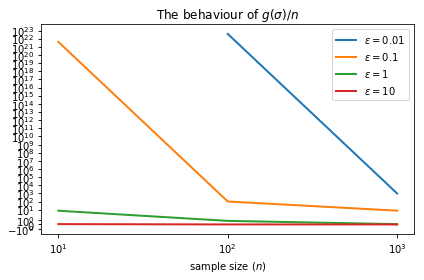

In [6]:
fig = plt.gcf()
for i in range(len(eps_values)):
    plt.plot(num_samples,func_vals[i,:],lw=2,label=''.join(['$\epsilon=$',str(eps_values[i])]))
plt.yscale('symlog')
plt.xscale('symlog')
plt.legend()
plt.title("The behaviour of $g(\sigma)/n$")
plt.xlabel("sample size ($n$)")
plt.tight_layout()

In [7]:
# save the figure
fig.savefig('bias_plot_1.pdf',dpi=100)

/usr/local/lib/python3.6/site-packages/numpy/ma/core.py:2143: RuntimeWarning: invalid value encountered in greater_equal
  condition = (xf >= v1) & (xf <= v2)
/usr/local/lib/python3.6/site-packages/numpy/ma/core.py:2143: RuntimeWarning: invalid value encountered in less_equal
  condition = (xf >= v1) & (xf <= v2)


In [8]:
num_samples = [10,100,1000]
eps_values = [1e-4,1e-3,1e-2,1e-1,1,10]
func_vals = np.zeros((len(num_samples),len(eps_values)))

for (j,n) in enumerate(num_samples):
    for(i,epsilon) in enumerate(eps_values):
        sigma = 2*np.sqrt(2*np.log(1.25/delta))/(n*epsilon*lmbda)
        for k in range(num_repeats):
            (X,T,Y) = data_generation(n,dim,bias,alpha_vec,alpha_0)
            func_vals[j,i] += bias_function(X,T,Y,wvec,sigma)/n
            
func_vals /= num_repeats

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.6/site-packages/numpy/ma/core.py:2143: RuntimeWarning: invalid value encountered in greater_equal
  condition = (xf >= v1) & (xf <= v2)
/usr/local/lib/python3.6/site-packages/numpy/ma/core.py:2143: RuntimeWarning: invalid value encountered in less_equal
  condition = (xf >= v1) & (xf <= v2)


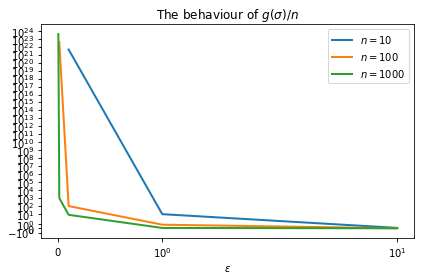

In [9]:
fig = plt.gcf()
for i in range(len(num_samples)):
    plt.plot(eps_values,func_vals[i,:],lw=2,label=''.join(['$n=$',str(num_samples[i])]))
    
plt.yscale('symlog')
plt.xscale('symlog')
plt.legend()
plt.title("The behaviour of $g(\sigma)/n$")
plt.xlabel("$\epsilon$")
plt.tight_layout()

In [10]:
# save the figure
fig.savefig('bias_plot_2.pdf',dpi=100)

/usr/local/lib/python3.6/site-packages/numpy/ma/core.py:2143: RuntimeWarning: invalid value encountered in greater_equal
  condition = (xf >= v1) & (xf <= v2)
/usr/local/lib/python3.6/site-packages/numpy/ma/core.py:2143: RuntimeWarning: invalid value encountered in less_equal
  condition = (xf >= v1) & (xf <= v2)
